# **Parcial II: Monte Carlo**
# **Física Computacional I**

### **Nombre:**
### **Código:**

In [29]:
import random, math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from tqdm import tqdm

J = 1

# Función que calcula la energía inicial del sistema
def energy(S, N, h, nbr):
        E = 0.0
        for k in range(N):
            # La energía corresponde a la interacción del espín con cada uno de sus vecinos próximos
            E = -J * S[k] * sum(S[nn] for nn in nbr[k]) - S[k]*h
        return 0.5 * E

def evolucion(S, L, T, h):
    # Función que calcula la energía total del sistema

    N = L*L
    # Da los vecinos próximos de cada espín i. Para los espines de los bordes se consideran condiciones
    # periódicas, de tal manera que el último espín es una fila o columna afecta la energía del primer
    # espín de la misma fila o columna, y vicecersa
    nbr = {i: ((i//L) * L + (i + 1) % L, (i + L) % N,
               (i//L) * L + (i - 1) % L, (i - L) % N) \
                                      for i in range(N)}
    
    beta = 1.0 / T
    
    S_ini = np.copy(S)

    # Número de pasos
    nsteps = N * 100
    Energy = energy(S, N, h, nbr)

    E = np.zeros(nsteps)

    for step in range(nsteps):
        k = np.random.randint(0, N-1)
        
        delta_E = J * 2.0 * S[k] * sum(S[nn] for nn in nbr[k]) + 2 * S[k] * h
        
        # Produce un cambio de la dirección de un espín de acuerdo con la distribución de probabilidad
        if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E):
            S[k] *= -1
            Energy += delta_E
        E[step] = Energy

    S_end = np.copy(S)

    M = np.sum(S_end)/N
    X = beta * (sum(S_end**2)/N - M**2)
    
    
    return S_end, M, X

### Curvas de magnetización

Para J=1, grafique las curvas $M$ vs $h$ para 5 temperaturas diferentes.

200it [1:33:38, 28.09s/it]
200it [8:03:31, 145.06s/it]
200it [1:24:33, 25.37s/it]
200it [1:25:17, 25.59s/it]
200it [1:30:59, 27.30s/it]


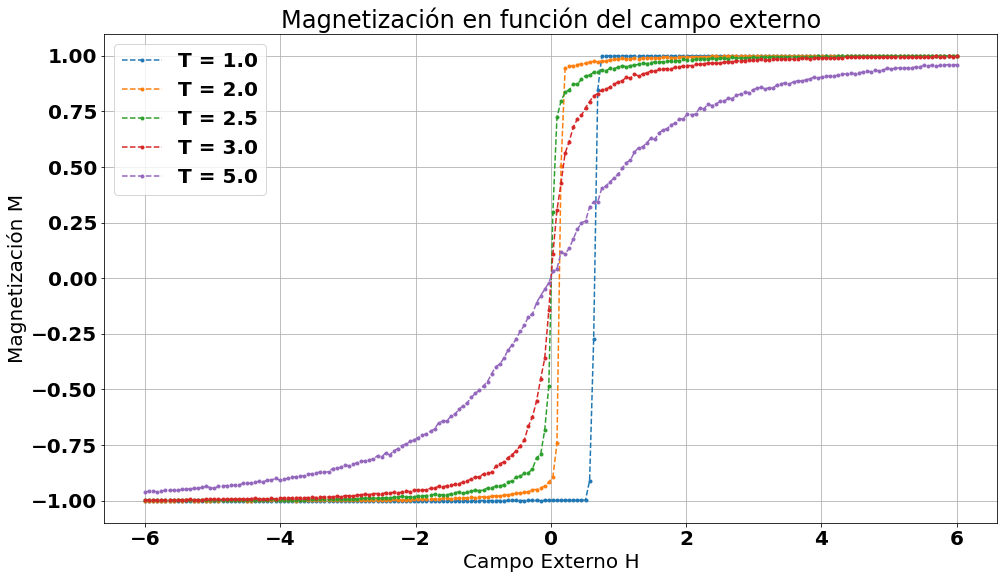

In [12]:
import pandas as pd

hn = 200
H = np.linspace(-6, 6, hn)
T = [1, 2, 2.5, 3, 5]

L = 128
# Genera una red aleatoria
init = [np.random.choice([1, -1]) for k in range(L*L)]

dict_magnetization = {}

plt.figure(figsize=(16,9))

font = {'family' : 'Times New Roman',
        'size'   : 20}

matplotlib.rc('font', **font)


plt.title("Magnetización en función del campo externo")
plt.xlabel("Campo Externo H")
plt.ylabel("Magnetización M")

for i in T:
    S = init
    M = np.zeros(hn)
    c = 0
    # Evalúa el sistema para cada temperatura a lo largo de varios h
    for j, k in tqdm(enumerate(H)):
        s, m, x = evolucion(S, L, i, k)
        M[j] = m
    
    dict_magnetization[i] = M
        
    plt.plot(H, M, linestyle='--', marker='.',label = f"T = {i:.1f}")

# Guarda los datos en un archivo para posterior graficación si es necesario
df = pd.DataFrame(dict_magnetization)
df.to_csv('raw_data/magnetizaciones.csv')

    
plt.grid()
plt.legend()
plt.savefig('imgs/magnetizaciones.png')

### Ciclo de histéresis

Escoja sólo una de las temperaturas con las que realizó el punto anterior y grafique M vs h, de tal manera que muestre la existencia de un ciclo de histéresis como se muestra en la figura.

In [32]:
import pandas as pd
hnn = 100

H_normal = np.linspace(-4, 4, hnn)

# Array con campo desde -6 hasta 6 y de vuelta
H_histeresis = np.concatenate((H_normal, H_normal[::-1]))

L = 32
S = [np.random.choice([1, -1]) for k in range(L*L)]

M_Histeresis = np.zeros(2*hnn)

for i, j in tqdm(enumerate(H_histeresis)):
    # Escojemos temperatura = 2
    s, m, x = evolucion(S, L, 1, j)
    M_Histeresis[i] = m

dict_histeresis = {'Campo' : H_histeresis, "Magnetización" : M_Histeresis}
df_histeresis = pd.DataFrame(dict_histeresis)
df_histeresis.to_csv('raw_data/histeresis.csv')

200it [05:09,  1.55s/it]


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


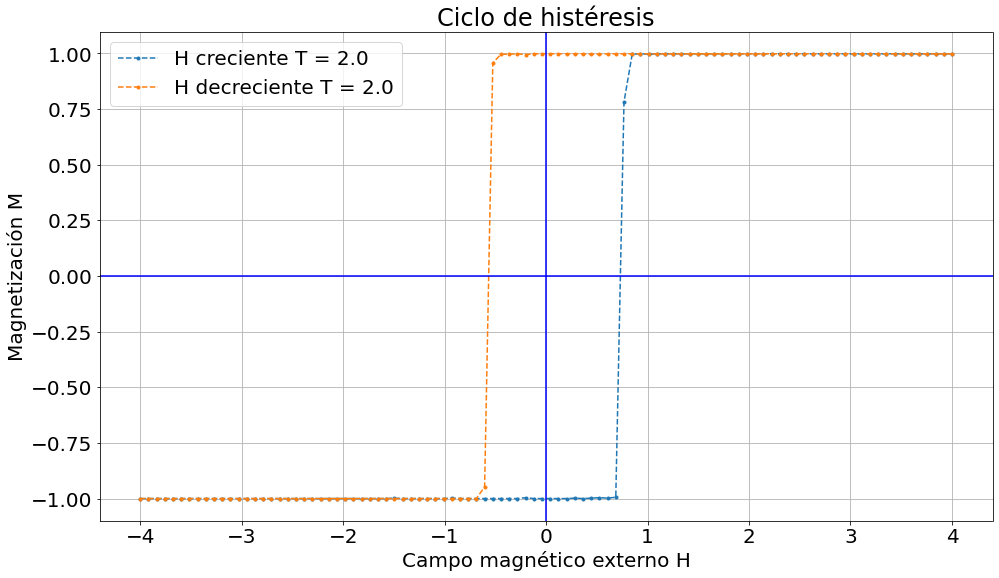

In [33]:
plt.figure(figsize = (16,9))

font = {'family' : 'Times New Roman',
        'size'   : 20}

matplotlib.rc('font', **font)

plt.title("Ciclo de histéresis")
plt.xlabel("Campo magnético externo H")
plt.ylabel("Magnetización M")


plt.plot(H_histeresis[:hnn], M_Histeresis[:hnn], linestyle='--', marker='.',label = "H creciente T = 2.0" )
plt.plot(H_histeresis[hnn:], M_Histeresis[hnn:], linestyle='--', marker='.',label = "H decreciente T = 2.0" )
plt.axvline(0, color = 'b')
plt.axhline(0, color = 'b')
plt.legend()
plt.grid()

plt.savefig('imgs/histeresis_short_range.png')

El campo de saturación es el campo $H_s$ al cual se llega a la magnetización de saturación.
El campo coercitivo es la intensidad de campo magnético $H_c$ que se debe aplicar a un material para anular su magnetización.
La magnetización remanente es la magnetización $M_s$ que queda al retirar el campo magnético externo.

Fijándonos en las ubicaciones donde se dan estas condiciones, los valores son $H_s = 0.559$, $H_c = 0.559$ y $M_s = 1.0$

In [13]:
def transition(S, L, h):
    N_sep = 50
    T = np.linspace(1, 4, N_sep)
    
    M = np.zeros(N_sep)
    
    for i,j in enumerate(T):
        s, m, x = evolucion(S, L, j, h)
        M[i] = abs(m)
        
    plt.title("Magnetización en función de la temperatura")
    plt.xlabel("Temperatura T")
    plt.ylabel("Magnetización M")
    plt.plot(T, M, label = f'Campo externo H = {h:.2f} L = {L: .2f}')
    
    plt.legend()
    plt.grid()

### Transición de fase

Para h = 0, obtenga una curva de magnetización en función de la temperatura (M vs T) que revele la existencia de una transición de fase.

100%|█████████████████████████████████████████| 5/5 [1:33:05<00:00, 1117.02s/it]


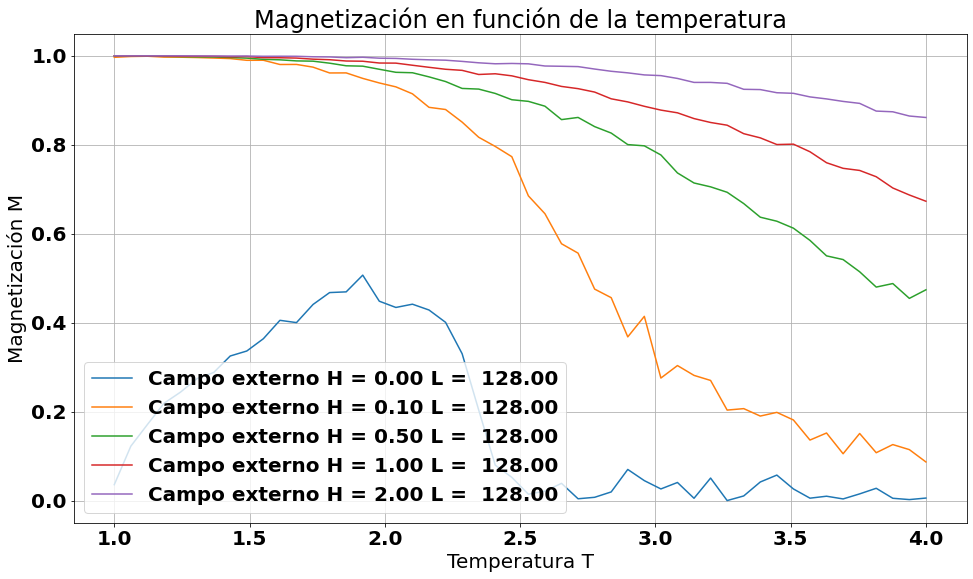

In [14]:
L = 128
S = [np.random.choice([1, -1]) for k in range(L*L)]

H = [0, 0.1, 0.5, 1, 2]

for i in tqdm(H):
    plt.figure(1, figsize=(16,9))
    transition(S, L, i)

100%|███████████████████████████████████████████████| 4/4 [15:40<00:00, 235.21s/it]


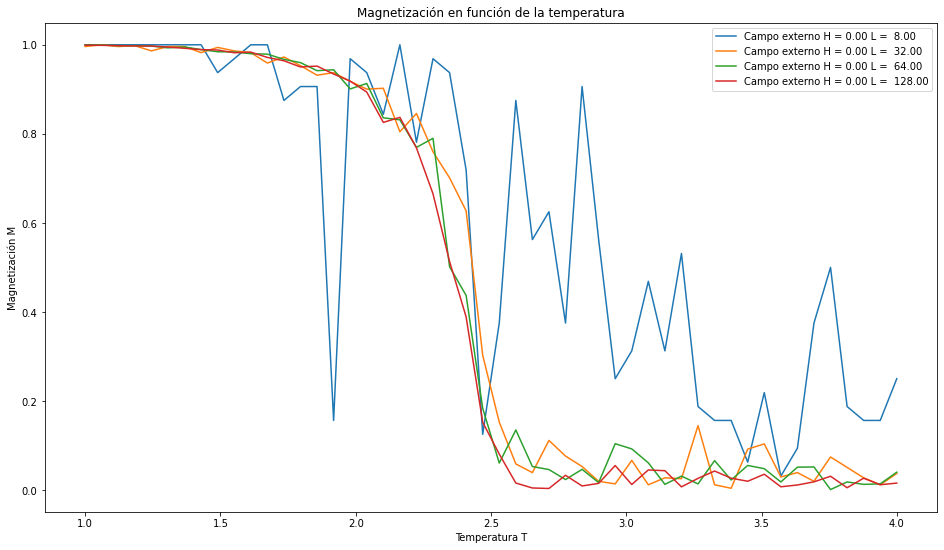

In [31]:
L = [8, 32, 64, 128]

for i in tqdm(L):
    plt.figure(1, figsize=(16,9))
    #S = [np.random.choice([1, -1]) for k in range(i*i)]
    S = [1 for k in range (i*i)]
    transition(S, i, 0)


font = {'family' : 'Times New Roman',
        'size'   : 20}

matplotlib.rc('font', **font)    

plt.grid()
plt.savefig('imgs/transition.png')

### Magnetización y susceptibilidad magnética

Para un h = 0, y un L de su elección, grafique en un subplot (M vs T) y (χ vs T).

In [2]:
def susceptibilidad(S, L):
    N = 100
    T = np.linspace(1, 10, N)
    
    M = np.zeros(N)
    X = np.zeros(N)
    
    for i,j in tqdm(enumerate(T)):
        s, m, x = evolucion(S, L, j, 0)
        M[i] = m
        X[i] = x
        
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches((16,9))
    font = {'family' : 'Times New Roman',
        'size'   : 20}

    matplotlib.rc('font', **font)
    
    plt.suptitle("Magnetización y susceptibilidad en función de la temperatura")
    
    axs[0].set_title("Magnetización")
    axs[0].set_xlabel("Temperatura T")
    axs[0].set_ylabel("Magnetización M")
    axs[0].plot(T, M, label = f'Campo externo H = {0:.2f}')
    
    plt.grid()
    
    axs[1].set_title("Susceptibilidad magnética")
    axs[1].set_xlabel("Temperatura T")
    axs[1].set_ylabel("Susceptibilidad magnética χ")
    axs[1].plot(T, X, label = f'Campo externo H = {0:.2f}')
    
    plt.grid()

100it [06:19,  3.79s/it]
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


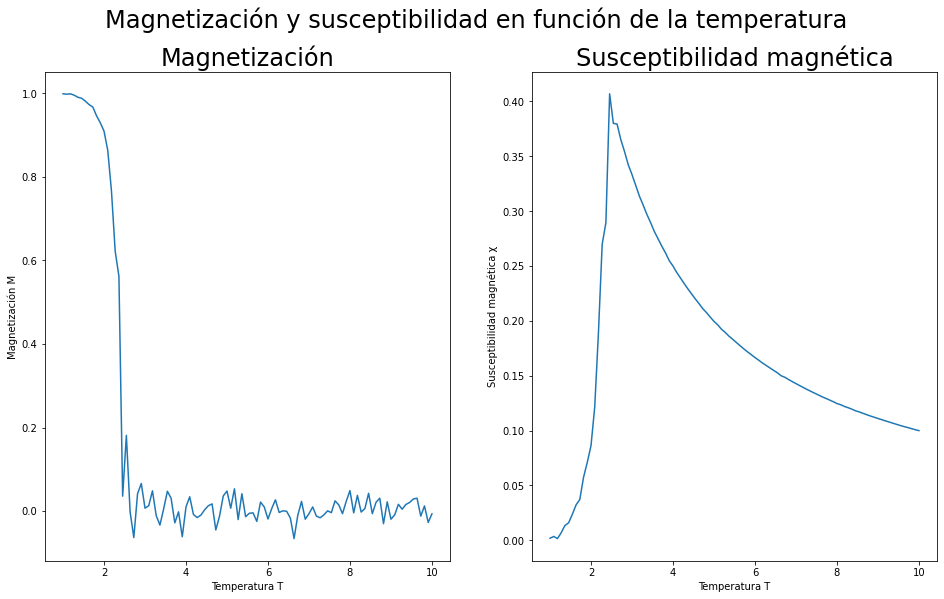

In [3]:
L = 64
S = [1 for k in range(L*L)]

susceptibilidad(S, L)

In [26]:
from matplotlib.colors import ListedColormap

def x_y(k, L):
    y = k // L
    x = k - y * L
    return x,y

def snapshots(S, L, h):
    font = {'family' : 'Times New Roman',
        'size'   : 20}

    matplotlib.rc('font', **font)
    
    fig, axs = plt.subplots(1, 5, sharey = True)
    fig.suptitle("Configuración de espines", y = 0.75)
    
    fig.set_size_inches((16,9))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    
    T = [1, 2, 2.5, 3, 5]
    
    for i,j in enumerate(T):
        
        conf = [[0 for x in range(L)] for y in range(L)]
        
        s, m, x = evolucion(S, L, j, h)
        
        for k in range(L*L):
            x, y = x_y(k, L)
            conf[x][y] = s[k]
        
        cmap = ListedColormap(["blue", "red"])
        
        axs[i].imshow(conf, extent = [0, L, 0, L], interpolation = 'nearest', cmap = cmap)
        axs[i].set_title(f'T = {j:.2f}')
    
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

    plt.show()
    fig.savefig('imgs/snapshots.png')

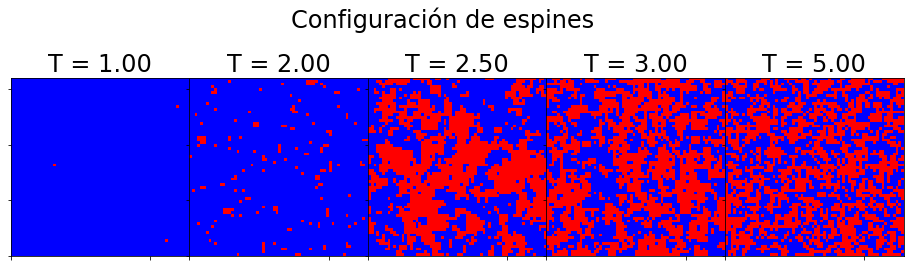

In [27]:
L = 64
# Genera una red con todos los espines apuntando hacia abajo
S = [-1 for k in range(L*L)]

snapshots(S, L, 0.01)

* Algunos de los resultados mostrados en este Notebook no corresponden con los presentados en el artículo debido a que varias de las gráficas se generaron directamente con un script de Python por comodidad.